# Loading data

In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
from geopandas import GeoDataFrame
from shapely.geometry import LineString, Point
import matplotlib.pyplot as plt
import contextily
import os
import folium

In [ ]:
path = "GTDdownload/"

print(os.listdir(path))

In [ ]:
def loadGTD(filename):
    link = 'GTDdownload/'+filename
    file = pd.read_excel(link)
    return file

In [ ]:
# loading complete dataset to memory (can take a while due to huge file size)
data = loadGTD("globalterrorismdb_0718dist.xlsx")

# Some descriptive analysis

In [ ]:
data.head()

In [ ]:
# subsetting worldwide dataset by countryname

def subsetGTDbyCountry(data, countryname):
    GTDcountry = data[data.country_txt == countryname]
    return GTDcountry

In [ ]:
GTDNigeria = subsetGTDbyCountry(data, "Nigeria")

In [ ]:
GTDNigeria.head()

In [ ]:
GTDNigeria.keys()

In [ ]:
GTDNigeria.shape

# Saving (loading) Nigeria data to (from) disk

In [ ]:
def saveGTDdata(data, countryname):
    # save data by countryname
    data.to_csv("GTDdownload/"+countryname+".csv")

In [ ]:
saveGTDdata(GTDNigeria, "Nigeria")
# reduced filesize to approx. 5 MB

In [2]:
def loadGTDdata(countryname):
    # load data by countryname
    data = pd.read_csv("GTDdownload/"+countryname+".csv")
    return data

In [3]:
GTDNigeria = loadGTDdata("Nigeria")

# Plots

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

In [5]:
toplot = GTDNigeria.gname.value_counts()

In [6]:
toplot.head()

Boko Haram                                                 2087
Unknown                                                    1045
Fulani extremists                                           498
Movement for the Emancipation of the Niger Delta (MEND)      85
Niger Delta Avengers (NDA)                                   50
Name: gname, dtype: int64

In [7]:
# Taking only the groups with 50 or more attacks since 1970
toplot = toplot[toplot >= 50]

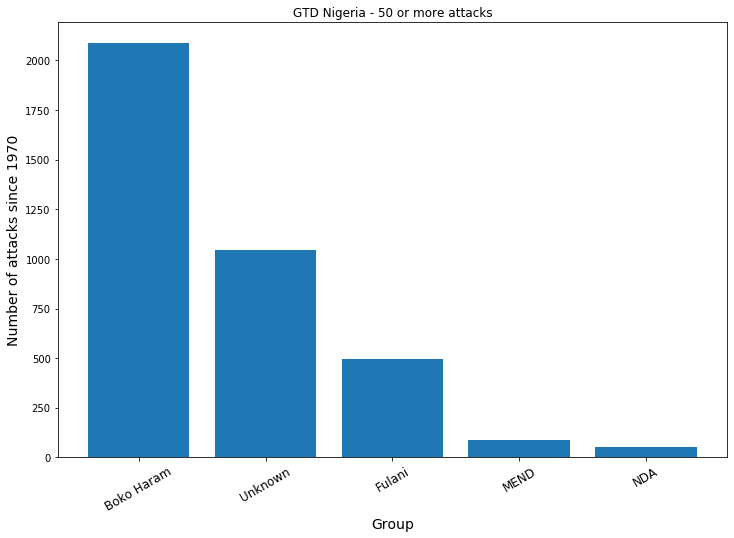

In [8]:
index = np.arange(len(toplot))
plt.bar(index, toplot)
plt.xlabel('Group', fontsize=14)
plt.ylabel('Number of attacks since 1970', fontsize=14)
plt.xticks(index, ["Boko Haram", "Unknown", "Fulani", "MEND", "NDA"], fontsize=12, rotation=30)
plt.title('GTD Nigeria - 50 or more attacks')
plt.show()

# Maps

In [9]:
# subset by Group

def subsetGTDbyGroup(data, groupname):
    GTDgroup = data[data.gname == groupname]
    return GTDgroup

In [10]:
GTDNigeriaBokoHaram = subsetGTDbyGroup(GTDNigeria, "Boko Haram")
GTDNigeriaFulani = subsetGTDbyGroup(GTDNigeria, "Fulani extremists")
GTDNigeriaUnknown = subsetGTDbyGroup(GTDNigeria, "Unknown")

In [11]:
def CreatMapbyGroup(groupdata):
    
    Geodata = groupdata[["longitude", "latitude"]].copy()
    Geodata = Geodata.dropna()
    
    folium_loc = [8.675277, 9.081999]
    map = folium.Map(location = folium_loc, zoom_start = 6)
    
    for row in Geodata.iterrows():
        row_values = row[1] 
        location = [row_values['latitude'], row_values['longitude']] # folium takes first lat then longitude
        marker = folium.Marker(location = location)
        marker.add_to(map)
    return map

In [12]:
BokoMap = CreatMapbyGroup(GTDNigeriaBokoHaram)
FulaniMap = CreatMapbyGroup(GTDNigeriaFulani)
UnknownMap = CreatMapbyGroup(GTDNigeriaUnknown)

In [13]:
# Boko Haram has a clear center of activities in the northeast of Nigeria

In [14]:
display(BokoMap)

In [15]:
# Fulani extremsists have a clear center of activities in the center from north to south of Nigeria

In [16]:
display(FulaniMap)

In [17]:
# Uknown terror attacks are distributed all over the country, 
# but have an emphasis in the south (oil industry as target?)

In [18]:
display(UnknownMap)